# adding translation to the image reconstruction algorithm
Adding in translation to your algorithm luckily fairly straightforward, if you understand the code from the main practical well. What we need to do is generate a set of reference images that are rotated by an incemental rotation angle $\Delta\text{angle}$, and also translated by a small vector $\Delta \vec{t}$. In theory the translation we may need can be continuous and we would need to resample the image and interpolate the pixels. However, let's for now just assume that the translations we need to apply to the image are integer pixel values. 

In [1]:
from shared.singleparticle import make_letter
from shared.useful_functions import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
im = make_letter("R", size=128)

def translate_image(im, dx, dy):
    """
    Translate an image by dx and dy
    """
    im_out = np.roll(im, shift=dx, axis=1)
    im_out = np.roll(im_out, shift=dy, axis=0)
    return im_out


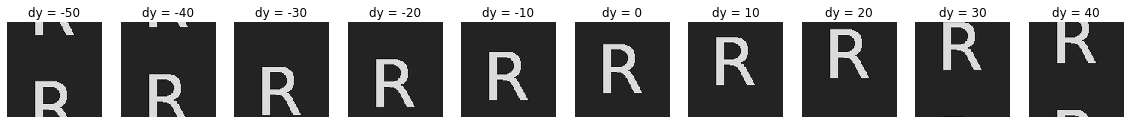

In [3]:
# showcase of what translated images look like
fig, ax = plt.subplots(1, 10, figsize=(20, 10))
for i, dy in enumerate(range(-50, 50, 10)):
    im_translated = translate_image(im, 0, dy)
    ax[i].imshow(im_translated, cmap="gray", interpolation="none", origin="lower")
    ax[i].axis("off")
    ax[i].set_title("dy = {}".format(dy))


## make a data set
Now let's make a data set where the images not only receive a random rotation, but also a translation that we should solve

C:\Users\mjoosten1\AppData\Local\Temp\ipykernel_10868\2016924764.py:6: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  image_rotated = ndimage.interpolation.rotate(im, angle, reshape=False)


(200, 128, 128)


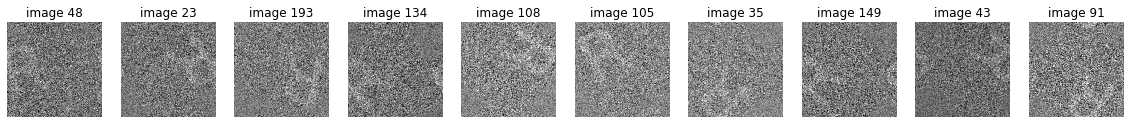

In [28]:
N = 200; sigma = 1
true_angles = np.random.uniform(0, 360, N) # these are the true angles of the particles
true_translations = np.random.randint(-20, 20, (N,2)) # these are the true translations of the particles, saved as a Nx2 array
images_stack = []
for angle, tx, ty in zip(true_angles, true_translations[:,0], true_translations[:,1]):
    image_rotated = ndimage.interpolation.rotate(im, angle, reshape=False)
    image_rotated_translated = np.roll(image_rotated,shift=tx, axis=0)
    image_rotated_translated = np.roll(image_rotated_translated,shift=ty, axis=1)
    image_rotated_translated_noisy = image_rotated_translated + sigma * np.random.randn(*im.shape)
    images_stack.append(image_rotated_translated_noisy)
images_stack = np.array(images_stack)
print(images_stack.shape)

fig, ax = plt.subplots(1, 10, figsize=(20, 10))
for ii, i in enumerate(np.random.randint(0, images_stack.shape[0], 10)):
    ax[ii].imshow(images_stack[i], cmap="gray", interpolation="none", origin="lower")
    ax[ii].axis("off")
    ax[ii].set_title("image {}".format(i))


## Reconstruction without translation
Let's first see how well the old code does at reconstructing this data. Paste your algorithm below and use it to make a reconstruction. Don't copy the helper functions, they are already loaded in of you.

In [ ]:
# copy your code here


# Task: Adding in the translations
Now it's up to you to extend the algorithm to estimate the translation alongside the rotation angle. First create the rotated references, then create a list (or array if you're good with numpy) of translated and rotated references. During the reconstruction, you will have to compare each image to the stack of rotated and translated reference images. If your code is not optimal, this could take a very, very long time. Remember that in the worst case, we have to now find one rotation angle out of 360/5 = 72 and the right translation out of 40^2 = 1600. This gives us 115200 combinations of parameters to search through. If your code runs too slowly, you can always ask for help to make it faster.

In the end, show that the reconstruction is improved compared to the old code. Also make a plot (or 2 plots for x- and y) where you compare the true translations to the esimated translation for each particle.

In [6]:
# updated algorithm
